Firstly import all the required packages

In [169]:
import nltk
import glob
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import llr
import operator
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import string
import numpy as np

<b>We first write a function to preprocess the data which does below:</b><br>
1) We first tokenize the data and remove the pronouns.<br>
2) Then we remove the stop words and punctuations from the tokens and then stem it.<br>
3) Then we remove the unwanted words that result due to stemming.<br>
4) then we join the tokens together to form a string and return it.<br>


In [170]:
def pre(text1):
 unwanted = ['\n','\t','\r','\'','"',':',';','.','/','!','#','$','%','{','}','(',')','?','&',']','[','-','_']
 lis1=[ word[0] for word in nltk.pos_tag(nltk.word_tokenize(text1)) if word[1] not in ['PRP','WP'] ]
 lis1=[nltk.stem.PorterStemmer().stem(word.lower()) for word in lis1 if word not in nltk.corpus.stopwords.words("English") and word not in string.punctuation and word not in unwanted ]
 lis1=[word for word in lis1 if word not in ('t','s','n','ve')]
 text=" ".join(lis1)
 return text

<b>In the below block:</b><br>
1) we read each file<br>
2) preprocess it using above function pre()<br>
3) Append the preprocessed file to corpus.<br>

In [171]:
file1=open("./Dataset2\\movie1.txt","r")
corpus.append(pre(text1))
text1=file1.read()
corpus=list()
corpus.append(pre(text1))
actual_labels=["Mus"]
for filename in glob.glob(os.path.join("./Dataset2/", '*.txt')):
 if filename not in "./Dataset2\\movie1.txt":
  if "movie" in filename: 
    actual_labels.append("Mus") 
  else:
    actual_labels.append("Spo") 
  file1=open(filename,"r")
  text1=file1.read()
  processed_file=pre(text1)
  corpus.append(processed_file)

After the files have been processed:<br>
1) we first pass the files to tfidfvectorizer to convert it into tfidf vector<br>
2) We then pass this tfidf vector matrix to sklearn kmeans function with 2 clusters as parameter and using k_means++ to optimize initial centroid selection.<br>
3) Then we form 2 different corpus from these 2 clusters and pass it to llr function to get the topics.<br>
4) Out of the topics for each corpus we output <b>first 20 topics for each</b> cluster.<br>

In [182]:
vectorizer= TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words='english', use_idf=True, ngram_range=(1,3))
sum=0
for i in range(len(corpus)):
    sum += len(corpus[i])
print("Total Features "+str(sum))
Z=vectorizer.fit_transform(corpus)

from sklearn.cluster import KMeans
#X=[[Z[0]],[Z[8]]
kmeans = KMeans(n_clusters=2,init='k-means++').fit(Z)
music = kmeans.labels_[0]
print("Clusters Labels: Music:{}   {}".format(music, kmeans.labels_ ))
print("Actual Labels: {}".format(actual_labels))

music=kmeans.labels_[0]
corpus_music=""
corpus_sports=""
for ind,i in enumerate(kmeans.labels_):
    if i==music:
        corpus_music= corpus_music+" "+corpus[ind]
    else:
        corpus_sports= corpus_sports+" "+corpus[ind]

cat1=llr.llr(corpus_sports,corpus_music)
lis1={}
for k,v in cat1.items():
 if v[0]==1 and k not in ('t','s','n','ve'):
  lis1[v[1]]=k

#print(sorted(lis1.items(),key=operator.itemgetter(0),reverse=True))

lis2={}
for k,v in cat1.items():
 if v[0]==2 and k not in ('t','s','n','ve'):
  lis2[v[1]]=k

print("\nTopics for 1st Category (LLR value, topic):\n\n{}".format(sorted(lis2.items(),key=operator.itemgetter(0),reverse=True)[:10]))
print("\nTopics for 2nd Category (LLR value, topic):\n\n{}".format(sorted(lis1.items(),key=operator.itemgetter(0),reverse=True)[:10]))

Total Features 68563
Clusters Labels: Music:1   [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1]
Actual Labels: ['Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo', 'Spo']

Topics for 1st Category (LLR value, topic):

[(64.48924988055424, 'music'), (29.100035684548594, 'indi'), (28.093244529019984, 'song'), (27.08669282911167, 'asian'), (27.06930221481305, 'sky'), (26.22660004758506, 'murray'), (23.222473275987365, 'say'), (23.06287887792702, 'work'), (20.2356508222832, 'want'), (19.65550138079571, 'peopl')]

Topics for 2nd Category (LLR value, topic):

[(40.956771985504936, 'season'), (37.53710888237093, 'win'), (35.82772807725865, 'seed'), (32.92451521237817, 'game'), (30.70138769738357, 'laker'), (30.616543118831128, 'unit'), (28.99320798542005, 'third'), (28.58050699218638, 'team'), (27.48598356701169, 'chelsea'), (27.2853283489439, 'ball')]


<b>As can be seen in above output the first category is Music and 2nd Category is Sports and it is evident from the topics too</b>
<br>
<br>
In the below code:
1) Firstly, I have calculated the (1-cosine similarity) which can be used as a metric to cmpare the 2 documents.<br>
2) ward is used to do hierarichal clustering. In the leaf nodes(as can be seen in dendogram) document 7 and document 10 were clustered together. I have extracted the topics for these 2 documents.<br>
3) I have plotted the final dendogram of hierarichal clustering.<br>

Topics for 7th and 10th document clustered together:

 {21.931870514653067: 'cultur', 11.013033530311684: 'differ', 6.842622094600276: 'session', 24.925277286307455: 'indian', 34.91679313148575: 'bowi', 7.753059994611344: 'sound', 6.043382096221039: 'mani', 12.33132495739786: 'act', 11.389794415782411: 'classic', 26.518555293021237: 'say', 13.019908520238937: 'sens', 5.3386636692211695: 'feel', 67.47404311486194: 'asian', 32.41776519182812: 'underground', 9.996469934395165: 'movement', 18.679946023216772: 'british', 17.43967585864113: 'singh', 29.919503472602692: 'sawhney', 14.94600407043861: 'jobanputra', 13.333733332672166: 'need'}


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


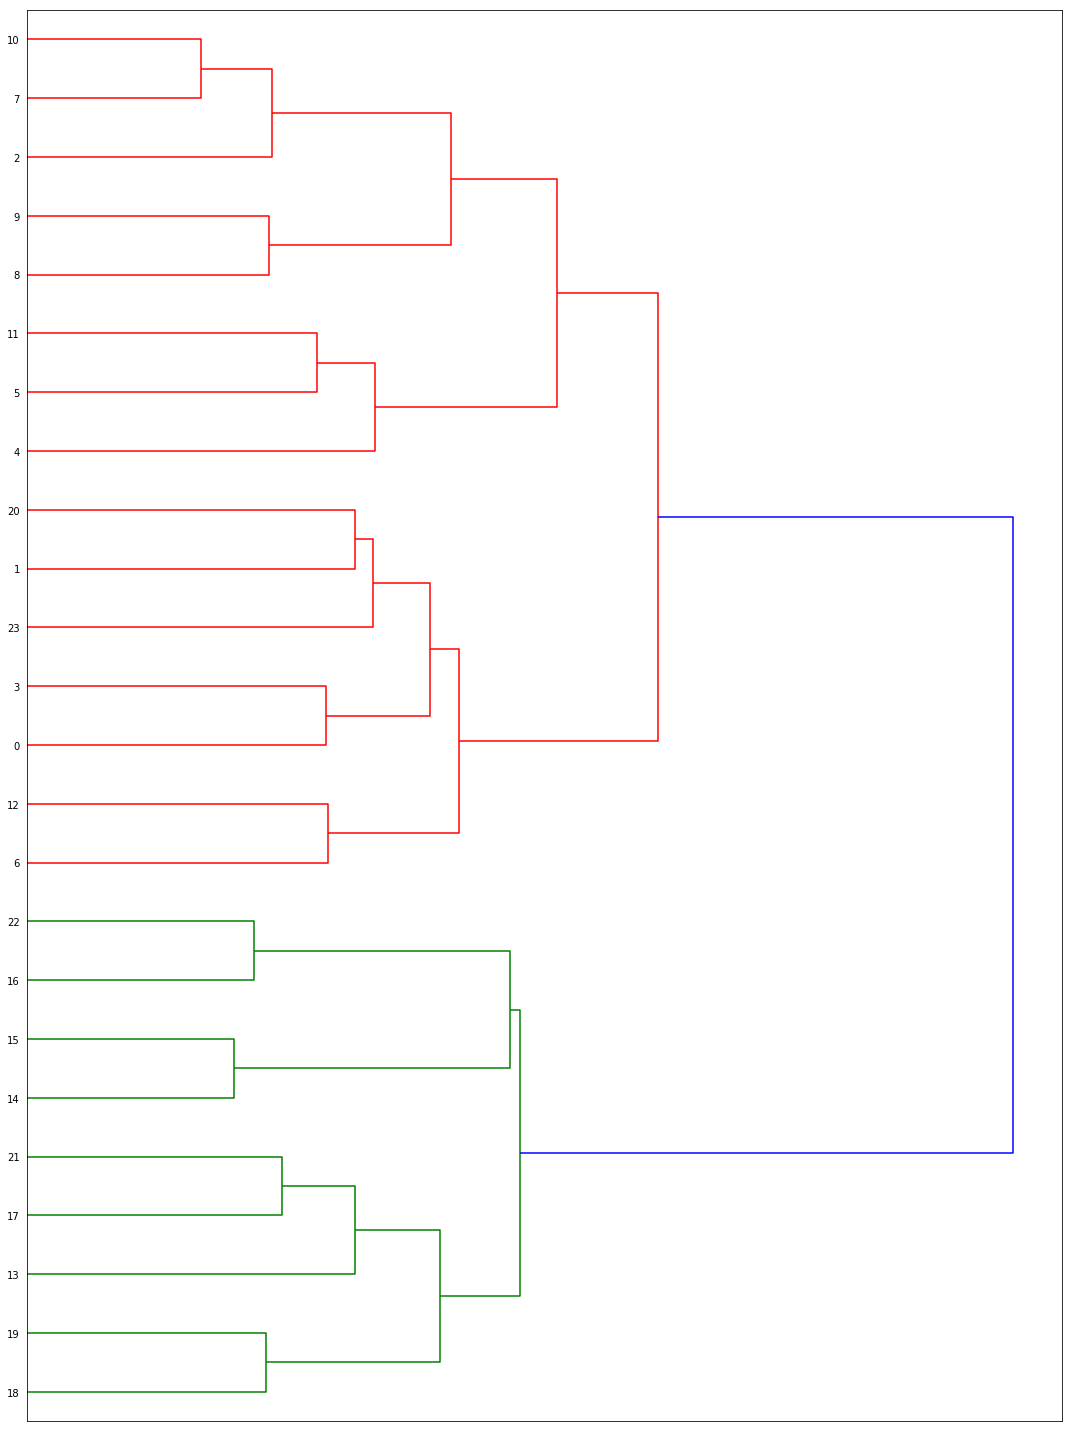

In [183]:
dist=1-cosine_similarity(Z)
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix=ward(dist)
titles=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

corpus_compare=""
for ind,i in enumerate(corpus):
    if i not in (linkage_matrix[0][0],linkage_matrix[0][1]) :
        corpus_compare= corpus_compare+" "+corpus[ind]
        
first,second = int(linkage_matrix[0][0]),int(linkage_matrix[0][1])

cat1=llr.llr(corpus[first]+" "+corpus[second],corpus_compare)
lis1={}
for k,v in cat1.items():
 if v[0]==1:
  lis1[v[1]]=k
print("Topics for 7th and 10th document clustered together:\n\n {}".format(lis1))

plt.tick_params(\
   axis= 'x',          
    which='both',      
    bottom='off',      
    top='off',      
    labelbottom='off')


plt.tight_layout()

<b>Finally I have used LDA to model the topics for these documents. For this I have performed below:</b> <br>
1) Firstly make Dictionary from the preprocessed corpora. <br>
2) Converted the coprora into bag of words <br>
3) passed above 2 into lda model with number of topics = 2
4) printed the results for the 2 topics

In [118]:
from gensim import corpora, models, similarities 

texts=list()
for item in corpus:
    texts.append(nltk.word_tokenize(item))
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=1, no_above=0.8)
corpus_lda = [dictionary.doc2bow(text) for text in texts]
lda=models.LdaModel(corpus_lda, num_topics=2, id2word=dictionary, update_every=5,chunksize=10000, passes= 100)
topics_matrix = lda.show_topics(formatted=False, num_words=20)
print("Topic 1: \n{}".format(topics_matrix[0]))
print("\nTopic 2: \n{}".format(topics_matrix[1]))

Topic 1: 
(0, [('``', 0.018494695), ('open', 0.0045553697), ('could', 0.0045542484), ('sky', 0.0043167844), ("n't", 0.0043134936), ('sport', 0.004080246), ('first', 0.003726713), ('last', 0.0034895192), ('murray', 0.003254189), ('said', 0.0032508767), ('one', 0.0030137997), ('back', 0.0028985604), ('go', 0.002897458), ('music', 0.0028905282), ('look', 0.0027806659), ('second', 0.0027804507), ('game', 0.0027794435), ('play', 0.0027794398), ('two', 0.0027788216), ('win', 0.0026605625)])

Topic 2: 
(1, [('``', 0.025750915), ('music', 0.006798857), ('year', 0.0049483315), ('indi', 0.004944979), ('said', 0.004779481), ('asian', 0.0044421), ('one', 0.004277368), ("n't", 0.003943895), ('like', 0.0034407298), ('say', 0.003273244), ('would', 0.0031046937), ('new', 0.0029343131), ('met', 0.0027688511), ('two', 0.0027665207), ('decad', 0.0027658332), ('westlif', 0.0027658173), ('first', 0.0027640464), ('even', 0.0024337603), ('make', 0.0024323184), ('william', 0.0024313352)])
